In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot property distributions

In [3]:
train_10k_scores = pd.read_csv('data/10k_samples/train_10k_scores.csv.gz')
prior_10k_scores = pd.read_csv('data/10k_samples/prior_10k_scores.csv.gz')
agent_her2_10k_scores = pd.read_csv('data/10k_samples/agent_her2_10k_scores.csv.gz')
agent_mpo_10k_scores = pd.read_csv('data/10k_samples/agent_mpo_10k_scores.csv.gz')

# Process error value on Prior HISum value, replace score smaller than -100 with -100, for ploting density distribution
prior_10k_scores['raw_HISum'] = prior_10k_scores['raw_HISum'].apply(lambda x: -100 if x < -100 else x)

## Prior 10k vs traning 10k

In [4]:
train_10k_dist = pd.read_csv('data/10k_samples/train_10k_dist.csv.gz').dist.to_numpy()
prior_10k_dist = pd.read_csv('data/10k_samples/prior_10k_dist.csv.gz').dist.to_numpy()
prior_train_10k_dist = pd.read_csv('data/10k_samples/prior_train_10k_dist.csv.gz').dist.to_numpy()
min_max = [np.min(arr) for arr in [train_10k_dist, prior_10k_dist, prior_train_10k_dist]] + [np.max(arr) for arr in [train_10k_dist, prior_10k_dist, prior_train_10k_dist]]
print(min(min_max), max(min_max))

1 14


In [6]:
def plot_density_graph(ax, prop, x, legend_loc="upper left", xlabel=None, xrefs=[]):
    xlabel = prop if xlabel is None else xlabel
    
    for xc in xrefs:
        ax.axvline(x=xc, ls=':', label=f"x={xc:4.2f}")
    
    train_propv = train_10k_scores[prop].values
    prior_propv = prior_10k_scores[prop].values
    
    y = stats.gaussian_kde(train_propv)(x)/sum(stats.gaussian_kde(train_propv)(x))
    ax.plot(x, y, label="Baseline", alpha=0.5, color='#1f77b4')
    ax.fill_between(x, 0, y, alpha=0.3, color='#1f77b4')

    y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
    ax.plot(x, y, label="Prior", alpha=0.5, color='#ff7f0e')
    ax.fill_between(x, 0, y, alpha=0.3, color='#ff7f0e')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc)

In [7]:
def plot_pairwise_dist_graph(ax, x, legend_loc="upper left", xlabel=None, xrefs=[]):
    xlabel = prop if xlabel is None else xlabel
    
    y = stats.gaussian_kde(train_10k_dist)(x)/sum(stats.gaussian_kde(train_10k_dist)(x))
    ax.plot(x, y, label="Baseline", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(prior_10k_dist)(x)/sum(stats.gaussian_kde(prior_10k_dist)(x))
    ax.plot(x, y, label="Prior", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc)

In [8]:
def plot_cross_dist_graph(ax, x, legend_loc="upper left", xlabel=None, xrefs=[]):
    y = stats.gaussian_kde(prior_train_10k_dist)(x)/sum(stats.gaussian_kde(prior_train_10k_dist)(x))
    ax.plot(x, y, alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

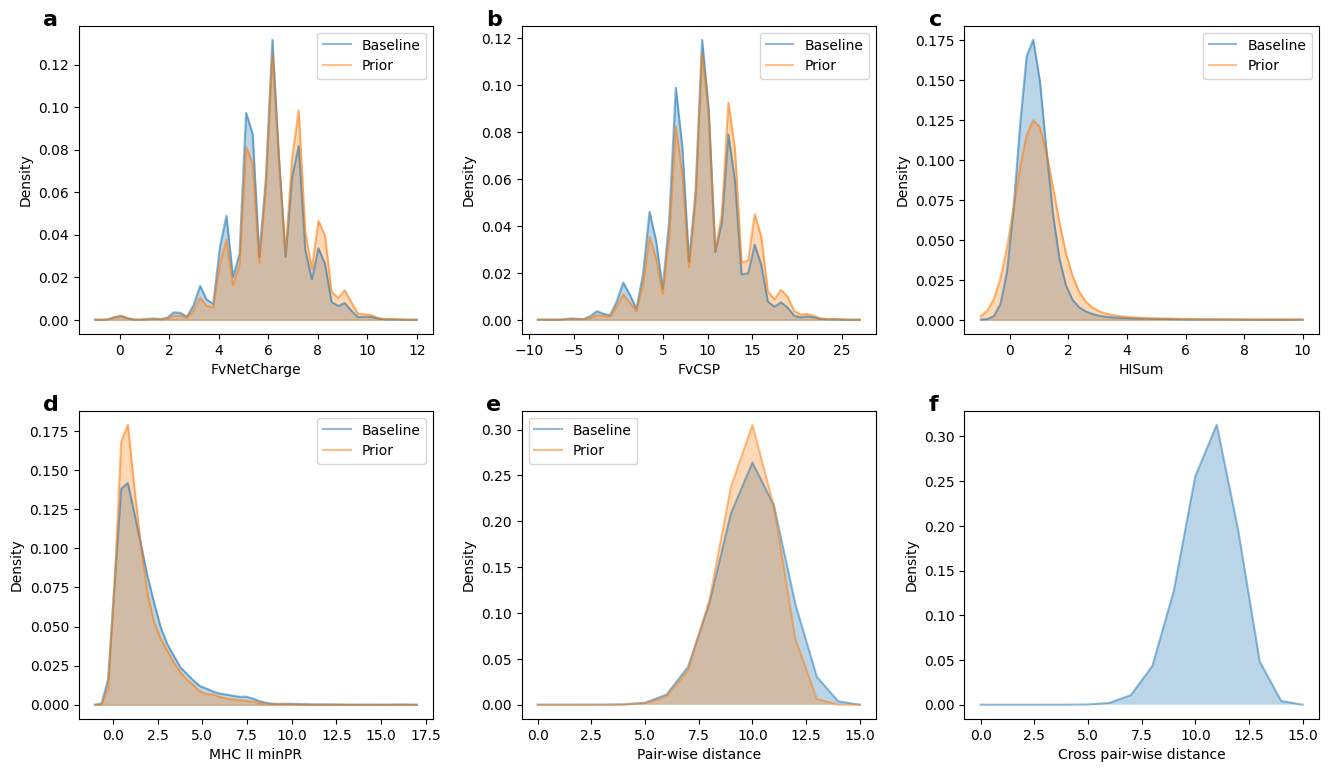

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

x = np.linspace(-1, 12, 50)
plot_density_graph(axs[0, 0], 'raw_FvNetCharge', x, legend_loc="upper right", xlabel='FvNetCharge', xrefs=[]) # < 6.2
axs[0, 0].text(-0.1, 1, "a", transform=axs[0, 0].transAxes, size=16, weight='bold')

x = np.linspace(-9, 27, 50)
plot_density_graph(axs[0, 1], 'raw_FvCSP', x, legend_loc="upper right", xlabel='FvCSP', xrefs=[]) # >6.61
axs[0, 1].text(-0.1, 1, "b", transform=axs[0, 1].transAxes, size=16, weight='bold')

x = np.linspace(-1, 10, 50)
plot_density_graph(axs[0, 2],'raw_HISum', x, legend_loc="upper right", xlabel='HISum', xrefs=[])  # [0, 4]
axs[0, 2].text(-0.1, 1, "c", transform=axs[0, 2].transAxes, size=16, weight='bold')

x = np.linspace(-1, 17, 50)
plot_density_graph(axs[1, 0],'raw_MHC2', x, legend_loc="upper right", xlabel='MHC II minPR', xrefs=[])  # >2.5
axs[1, 0].text(-0.1, 1, "d", transform=axs[1, 0].transAxes, size=16, weight='bold')

x = np.linspace(0, 15, 16)
plot_pairwise_dist_graph(axs[1, 1], x, legend_loc="upper left", xlabel='Pair-wise distance', xrefs=[]) # < 6.2
axs[1, 1].text(-0.1, 1, "e", transform=axs[1, 1].transAxes, size=16, weight='bold')

x = np.linspace(0, 15, 16)
plot_cross_dist_graph(axs[1, 2], x, legend_loc="upper left", xlabel='Cross pair-wise distance', xrefs=[])
axs[1, 2].text(-0.1, 1, "f", transform=axs[1, 2].transAxes, size=16, weight='bold')

fig.savefig("figures/prior_train_cmp.pdf", bbox_inches='tight')

## Prior vs Agent_HER2 vs Agent_MPO

In [10]:
def plot_success_rate_bar(ax, ylabel='Success rate'):
    success_rate = dict()
    success_rate["Baseline"] = train_10k_scores['is_success'].sum() / len(train_10k_scores['is_success'])
    success_rate["Prior"] = prior_10k_scores['is_success'].sum() / len(prior_10k_scores['is_success'])
    success_rate["Agent_HER2"] = agent_her2_10k_scores['is_success'].sum() / len(agent_her2_10k_scores['is_success'])
    success_rate["Agent_MPO"] = agent_mpo_10k_scores['is_success'].sum() / len(agent_mpo_10k_scores['is_success'])
    ax.bar(success_rate.keys(), success_rate.values(), alpha=0.5)
    ax.set_xticklabels(success_rate.keys(), rotation=30, ha='right')
    ax.set_ylabel(ylabel)

In [11]:
def plot_her2_hist(ax, prop='raw_HER2', legend_loc="upper right", xlabel=None):
    x = np.linspace(0, 1, 50)
    xlabel = prop if xlabel is None else xlabel
    xref=0.7
    
    ax.axvline(x=xref, ls=':', label=f"x={xref:4.2f}")
    ax.annotate('', xy=(xref+0.05,5000), xytext=(xref,5000), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    # ax.hist(train_10k_scores[prop].tolist(), bins=x, label="Baseline", alpha=0.5)
    ax.hist(agent_her2_10k_scores[prop].tolist(), bins=x, label="Agent_HER2", alpha=0.5)
    ax.hist(agent_mpo_10k_scores[prop].tolist(), bins=x, label="Agent_MPO", alpha=0.5)
    ax.hist(prior_10k_scores[prop].tolist(), bins=x, label="Prior", alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.legend(loc=legend_loc, framealpha=0.5)

In [12]:
def plot_FvNetCharge_density(ax, prop='raw_FvNetCharge', legend_loc="upper left", xlabel='Fv net charge'):
    x = np.linspace(-1, 12, 50)
    FvNetCharge_threshold = 6.2
    FvCSP_threshold = 5.21 # FvNetCharge value for Herceptin, where FvCSP=6.61
    
    ax.axvline(x=FvNetCharge_threshold, ls=':', label=f"FvNetCharge={FvNetCharge_threshold:4.2f}", color='#1f77b4')
    ax.axvline(x=FvCSP_threshold, ls=':', label=f"FvCSP={6.61:4.2f}", color='#ff7f0e')
    ax.annotate('', xy=(FvNetCharge_threshold-0.7,0.3), xytext=(FvNetCharge_threshold,0.3), arrowprops={'arrowstyle': '-|>'}, va='center')
    ax.annotate('', xy=(FvCSP_threshold+0.7,0.28), xytext=(FvCSP_threshold,0.28), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    prior_propv = prior_10k_scores[prop].values
    agent_her2_propv = agent_her2_10k_scores[prop].values
    agent_mpo_propv = agent_mpo_10k_scores[prop].values
    

    y = stats.gaussian_kde(agent_her2_propv)(x)/sum(stats.gaussian_kde(agent_her2_propv)(x))
    ax.plot(x, y, label="Agent_HER2", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(agent_mpo_propv)(x)/sum(stats.gaussian_kde(agent_mpo_propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
    ax.plot(x, y, label="Prior", alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc, framealpha=0)

In [13]:
def plot_FvCSP_density(ax, prop='raw_FvCSP', legend_loc="upper left", xlabel='Fv net charge'):
    x = np.linspace(-9, 27, 50)
    FvNetCharge_threshold = 9.61  # FvCSP value where FvNetCharge=6.2
    FvCSP_threshold = 6.61 # FvCSP value for Herceptin
    
    ax.axvline(x=FvNetCharge_threshold, ls=':', label=f"FvNetCharge={6.2:4.2f}", color='#1f77b4')
    ax.axvline(x=FvCSP_threshold, ls=':', label=f"FvCSP={FvCSP_threshold:4.2f}", color='#ff7f0e')
    ax.annotate('', xy=(FvNetCharge_threshold-2,0.20), xytext=(FvNetCharge_threshold,0.20), arrowprops={'arrowstyle': '-|>'}, va='center')
    ax.annotate('', xy=(FvCSP_threshold+2,0.18), xytext=(FvCSP_threshold,0.18), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    prior_propv = prior_10k_scores[prop].values
    agent_her2_propv = agent_her2_10k_scores[prop].values
    agent_mpo_propv = agent_mpo_10k_scores[prop].values

    y = stats.gaussian_kde(agent_her2_propv)(x)/sum(stats.gaussian_kde(agent_her2_propv)(x))
    ax.plot(x, y, label="Agent_HER2", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(agent_mpo_propv)(x)/sum(stats.gaussian_kde(agent_mpo_propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
    ax.plot(x, y, label="Prior", alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc, framealpha=0)

In [14]:
def plot_HISum_density(ax, legend_loc="upper left", xlabel=None):
    x = np.linspace(-1, 10, 50)
    prop = 'raw_HISum'
    xlabel = prop if xlabel is None else xlabel
    xref1,xref2 = 0, 4
    ax.axvline(x=xref1, ls=':', label=f"x={xref1:4.2f}", color='#1f77b4')
    ax.axvline(x=xref2, ls=':', label=f"x={xref2:4.2f}", color='#ff7f0e')
    ax.annotate('', xy=(xref1+0.6,0.28), xytext=(xref1,0.28), arrowprops={'arrowstyle': '-|>'}, va='center')
    ax.annotate('', xy=(xref2-0.6,0.30), xytext=(xref2,0.30), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    prior_propv = prior_10k_scores[prop].values
    agent_her2_propv = agent_her2_10k_scores[prop].values
    agent_mpo_propv = agent_mpo_10k_scores[prop].values
    
    y = stats.gaussian_kde(agent_her2_propv)(x)/sum(stats.gaussian_kde(agent_her2_propv)(x))
    ax.plot(x, y, label="Agent_HER2", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(agent_mpo_propv)(x)/sum(stats.gaussian_kde(agent_mpo_propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
    ax.plot(x, y, label="Prior", alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc, framealpha=0)

In [15]:
def plot_MHC2_density(ax, prop='raw_MHC2', legend_loc="upper left", xlabel=None):
    x = np.linspace(-1, 17, 50)
    xlabel = prop if xlabel is None else xlabel
    xref=2.51
    ax.axvline(x=xref, ls=':', label=f"x={xref:4.2f}")
    ax.annotate('', xy=(xref+1,0.1), xytext=(xref,0.1), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    # train_propv = train_10k_scores[prop].values
    prior_propv = prior_10k_scores[prop].values
    agent_her2_propv = agent_her2_10k_scores[prop].values
    agent_mpo_propv = agent_mpo_10k_scores[prop].values

    y = stats.gaussian_kde(agent_her2_propv)(x)/sum(stats.gaussian_kde(agent_her2_propv)(x))
    ax.plot(x, y, label="Agent_HER2", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(agent_mpo_propv)(x)/sum(stats.gaussian_kde(agent_mpo_propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)

    y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
    ax.plot(x, y, label="Prior", alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

    ax.legend(loc=legend_loc, framealpha=0)

/tmp/ipykernel_1880644/4181350093.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(success_rate.keys(), rotation=30, ha='right')


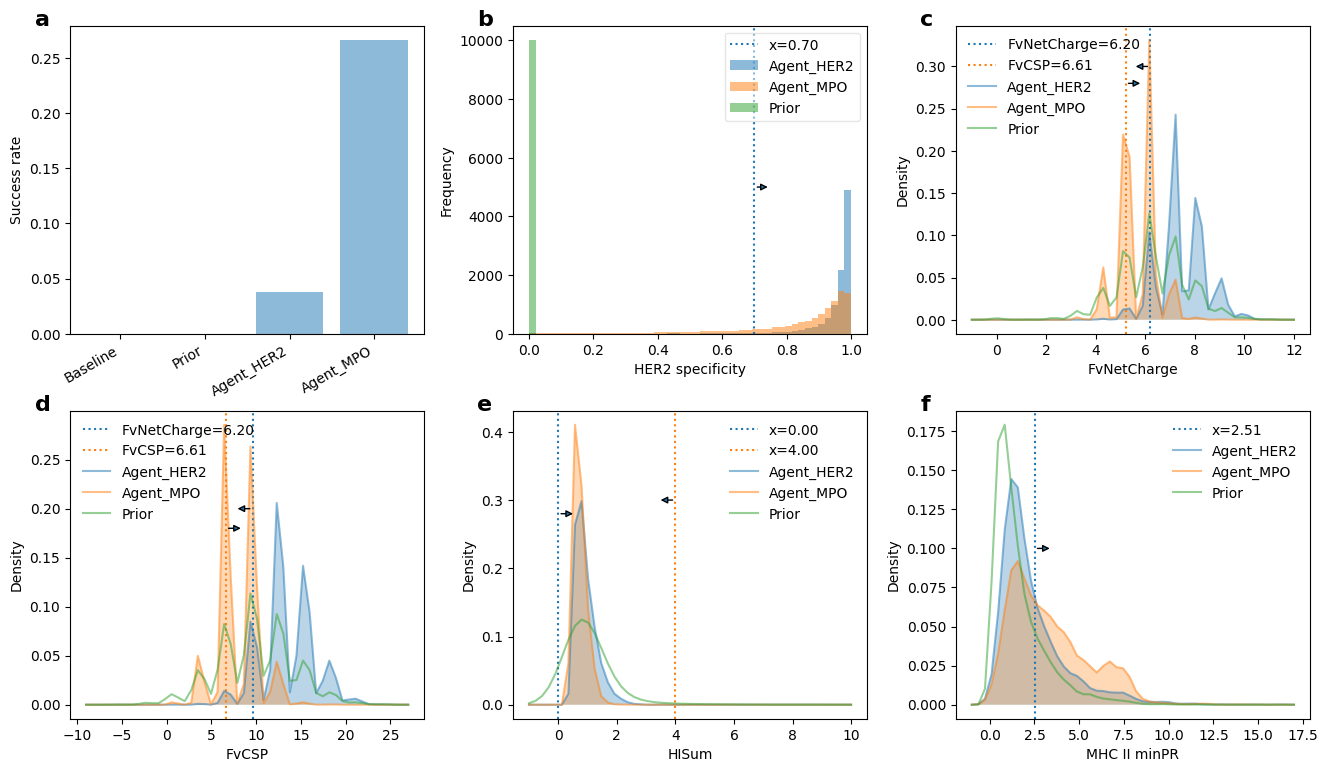

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plot_success_rate_bar(axs[0, 0], ylabel='Success rate')
axs[0, 0].text(-0.1, 1, "a", transform=axs[0, 0].transAxes, size=16, weight='bold')

plot_her2_hist(axs[0, 1], legend_loc="upper right", xlabel='HER2 specificity')  # >0.7
axs[0, 1].text(-0.1, 1, "b", transform=axs[0, 1].transAxes, size=16, weight='bold')

plot_FvNetCharge_density(axs[0, 2], legend_loc="upper left", xlabel='FvNetCharge') # < 6.2
axs[0, 2].text(-0.1, 1, "c", transform=axs[0, 2].transAxes, size=16, weight='bold')

plot_FvCSP_density(axs[1, 0], legend_loc="upper left", xlabel='FvCSP') # >6.61
axs[1, 0].text(-0.1, 1, "d", transform=axs[1, 0].transAxes, size=16, weight='bold')


plot_HISum_density(axs[1, 1], legend_loc="upper right", xlabel='HISum')  # [0, 4]
axs[1, 1].text(-0.1, 1, "e", transform=axs[1, 1].transAxes, size=16, weight='bold')


plot_MHC2_density(axs[1, 2],'raw_MHC2', legend_loc="upper right", xlabel='MHC II minPR')  # >2.5
axs[1, 2].text(-0.1, 1, "f", transform=axs[1, 2].transAxes, size=16, weight='bold')

fig.savefig("figures/density.pdf", bbox_inches='tight')